<a href="https://colab.research.google.com/github/sayandkrishna/TRAFFIC-SIGNAL-DETECTION/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install ultralytics
!pip install kaggle
!pip install --upgrade ultralytics ray

# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

# Set up Kaggle API and download dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pkdarabi/cardetection
!unzip cardetection.zip

# Import essential libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings

warnings.filterwarnings('ignore')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 11.8 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
  inflating: car/train/labels/00000_00003_00026_png.rf.a3b6c2dcd4ee9a8064667b7bb266590b.txt  
  inflating: car/train/labels/00000_00003_00027_png.rf.c1381ed46ee0d7e21877ea3d7ef86127.txt  
  inflating: car/train/labels/00000_00003_00029_png.rf.8e24d2606537779612888c6a06c7043d.txt  
  inflating: car/train/labels/00000_00004_00000_png.rf.45dccdbf08ed12f25d7742d8bf88c102.txt  
  inflating: car/train/labels/00000_00004_00001_png.rf.557d3494b3e633e29069a6f42918334e.txt  
  inflating: car/train/labels/00000_00004_00002_png.rf.3e3e95e1ba16cac885d3de7864a40fb4.txt  
  inflating: car/train/labels/00000_00004_00003_png.rf.9c6ba4d0186eec82a26bddc9a1204efb.txt  
  inflating: car/train/labels/00000_00004_00003_png.rf.a8220aafd1a7f7bba4391bd0a10cdd2f.txt  
  inflating: car/train/labels/00000_00004_00004_png.rf.d4f5ee50324659a47ec7ae664f8ce3a6.txt  
  inflating: car/train/labels/00000_00004_00005_png.rf.55e0ec09c7c892e631d9197011a8ad27.txt  
  inflati

In [ ]:
# Configure visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')


In [ ]:
# Updated image directory path
Image_dir = '/content/car/train/images'


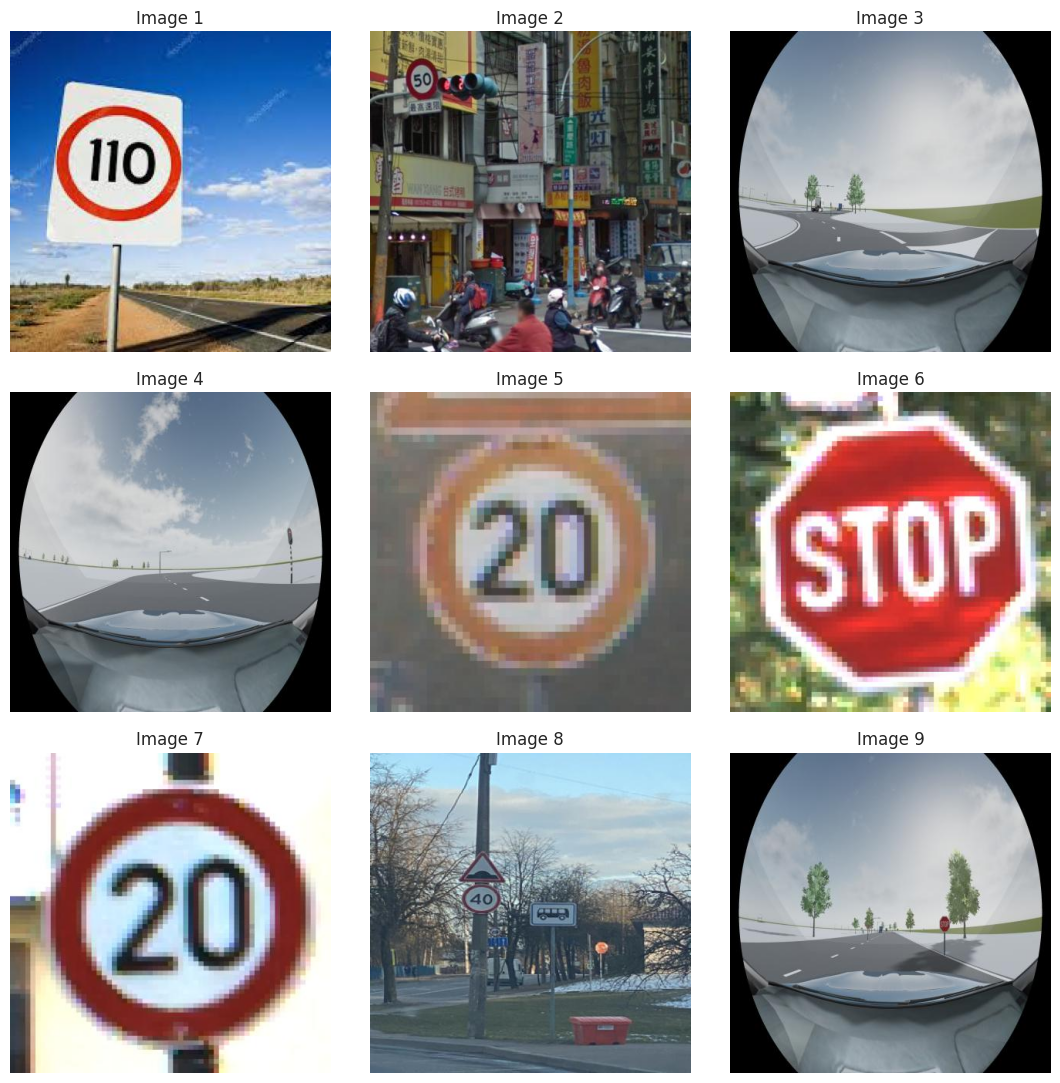

In [ ]:
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /content/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 7.9ms
Speed: 12.9ms preprocess, 7.9ms inference, 103.6ms postprocess per image at shape (1, 3, 640, 640)


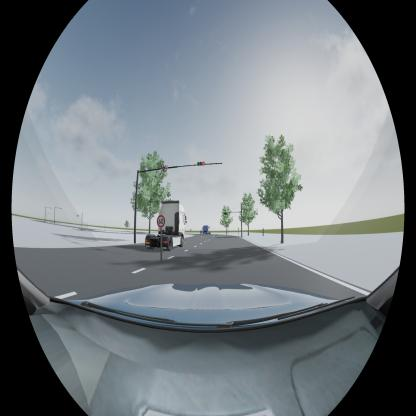

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')


Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.1MB/s]


AMP: checks passed ✅


train: Scanning /content/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 1901.57it/s]

train: New cache created: /content/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.12G reserved, 0.09G allocated, 14.54G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.214          69.7           365        (1, 3, 640, 640)                    list
     3013773       16.42         0.321         22.89          48.3        (2, 3, 640, 640)                    list
     3013773       32.84         0.570          23.1         49.72        (4, 3, 640, 640)                    list
     3013773       65.67         0.998         30.39         68.79        (8, 3, 640, 640)                    list
     3013773       131.3         1.

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 801.87it/s]

val: New cache created: /content/car/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.81G     0.8842      3.845      1.221         88        640: 100%|██████████| 47/47 [01:08<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        801        944     0.0374      0.735      0.105     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.74G     0.7271      2.711       1.09         80        640: 100%|██████████| 47/47 [01:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        801        944       0.32      0.371      0.274      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       9.7G     0.7246       2.25      1.077         68        640: 100%|██████████| 47/47 [01:01<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.86s/it]


                   all        801        944      0.392      0.419      0.379      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.72G     0.7202       1.95      1.068         60        640: 100%|██████████| 47/47 [01:03<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]

                   all        801        944      0.492      0.601      0.609      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.72G      0.683      1.601      1.045         84        640: 100%|██████████| 47/47 [01:08<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]

                   all        801        944      0.612      0.654      0.698      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.73G     0.6667      1.428      1.035         72        640: 100%|██████████| 47/47 [01:03<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.90s/it]

                   all        801        944      0.787      0.681      0.787      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.72G     0.6569      1.295      1.023         88        640: 100%|██████████| 47/47 [01:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.69s/it]

                   all        801        944      0.812      0.715      0.813      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.72G     0.6444      1.171      1.015         84        640: 100%|██████████| 47/47 [01:05<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.43s/it]

                   all        801        944      0.847      0.768      0.859      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.72G     0.6274      1.096      1.004         71        640: 100%|██████████| 47/47 [01:05<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]

                   all        801        944        0.9       0.78      0.871      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.72G     0.6208      1.015     0.9977         76        640: 100%|██████████| 47/47 [01:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.69s/it]

                   all        801        944      0.893      0.794      0.888      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.73G     0.6199     0.9606     0.9984         92        640: 100%|██████████| 47/47 [01:02<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        801        944      0.921      0.812      0.904      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.72G     0.6104     0.9231      0.997         87        640: 100%|██████████| 47/47 [01:02<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all        801        944       0.89      0.755      0.862      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.74G      0.598     0.8822     0.9918         75        640: 100%|██████████| 47/47 [01:02<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]

                   all        801        944      0.913       0.81      0.906      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.73G     0.5877     0.8414     0.9864         71        640: 100%|██████████| 47/47 [01:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]

                   all        801        944      0.922      0.844      0.917      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.74G     0.5812     0.8001      0.985         70        640: 100%|██████████| 47/47 [01:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]

                   all        801        944      0.932       0.83      0.918      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       9.7G     0.5765     0.7851     0.9792         79        640: 100%|██████████| 47/47 [01:03<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.81s/it]

                   all        801        944      0.918      0.847      0.925      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.74G     0.5612     0.7486     0.9698         70        640: 100%|██████████| 47/47 [01:03<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.74s/it]

                   all        801        944      0.933      0.836      0.931      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.72G     0.5681     0.7424     0.9744         74        640: 100%|██████████| 47/47 [01:03<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        801        944      0.932      0.848       0.93      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.73G     0.5504     0.7154     0.9652         85        640: 100%|██████████| 47/47 [01:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]

                   all        801        944      0.939      0.852      0.934      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.72G     0.5502     0.6918     0.9608         74        640: 100%|██████████| 47/47 [01:03<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]

                   all        801        944      0.933      0.863      0.938      0.803


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.66G     0.5577     0.5402     0.9386         45        640: 100%|██████████| 47/47 [01:03<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.71s/it]

                   all        801        944      0.925      0.866      0.939      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.66G     0.5467      0.509     0.9293         49        640: 100%|██████████| 47/47 [00:58<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        801        944      0.928      0.885      0.943      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.66G     0.5418     0.4866     0.9346         36        640: 100%|██████████| 47/47 [00:59<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]

                   all        801        944      0.948      0.861      0.943      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.66G     0.5292     0.4604     0.9229         38        640: 100%|██████████| 47/47 [00:58<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all        801        944      0.948      0.881       0.95      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.73G     0.5268      0.441     0.9185         46        640: 100%|██████████| 47/47 [00:58<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.75s/it]

                   all        801        944      0.957      0.878      0.952       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.66G     0.5144     0.4297     0.9125         39        640: 100%|██████████| 47/47 [01:00<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]

                   all        801        944      0.928      0.887      0.954      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.66G     0.5127     0.4176      0.918         44        640: 100%|██████████| 47/47 [00:58<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all        801        944      0.938      0.902      0.956      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.66G     0.4984     0.3931     0.9042         45        640: 100%|██████████| 47/47 [00:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.83s/it]

                   all        801        944      0.957      0.878      0.954      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.66G     0.4985     0.3922     0.9038         44        640: 100%|██████████| 47/47 [00:58<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        801        944      0.967      0.881       0.96       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.66G     0.4915     0.3819     0.9005         42        640: 100%|██████████| 47/47 [00:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.85s/it]

                   all        801        944      0.942      0.897       0.96      0.831



30 epochs completed in 0.620 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.32s/it]


                   all        801        944      0.942      0.897       0.96      0.831
           Green Light         87        122      0.915      0.708      0.875      0.509
             Red Light         74        108      0.895      0.741      0.845      0.535
       Speed Limit 100         52         52      0.961      0.941      0.985      0.904
       Speed Limit 110         17         17       0.74      0.882      0.937      0.854
       Speed Limit 120         60         60      0.983      0.977      0.991      0.921
        Speed Limit 20         56         56      0.971      0.982      0.985      0.882
        Speed Limit 30         71         74       0.97      0.959      0.992       0.92
        Speed Limit 40         53         55      0.964      0.974      0.991        0.9
        Speed Limit 50         68         71      0.973      0.845      0.965      0.864
        Speed Limit 60         76         76      0.926      0.921      0.965      0.886
        Speed Limit 7

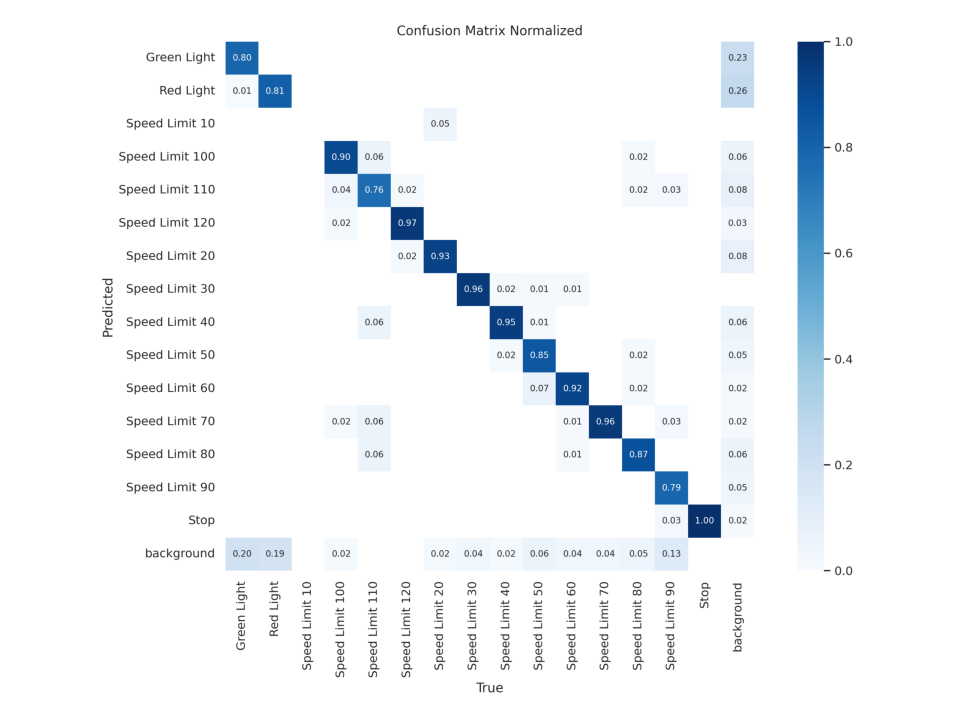

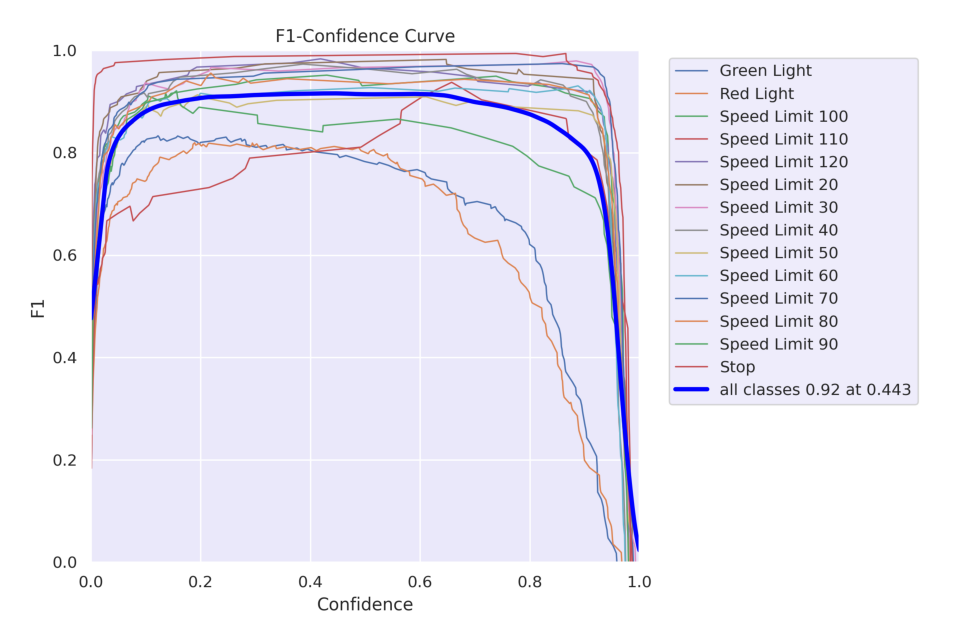

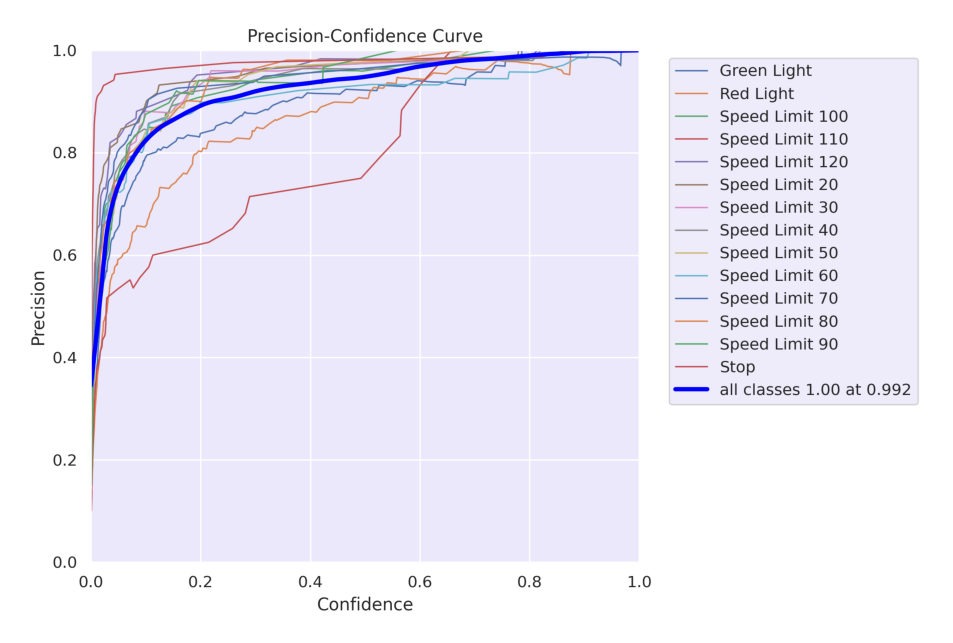

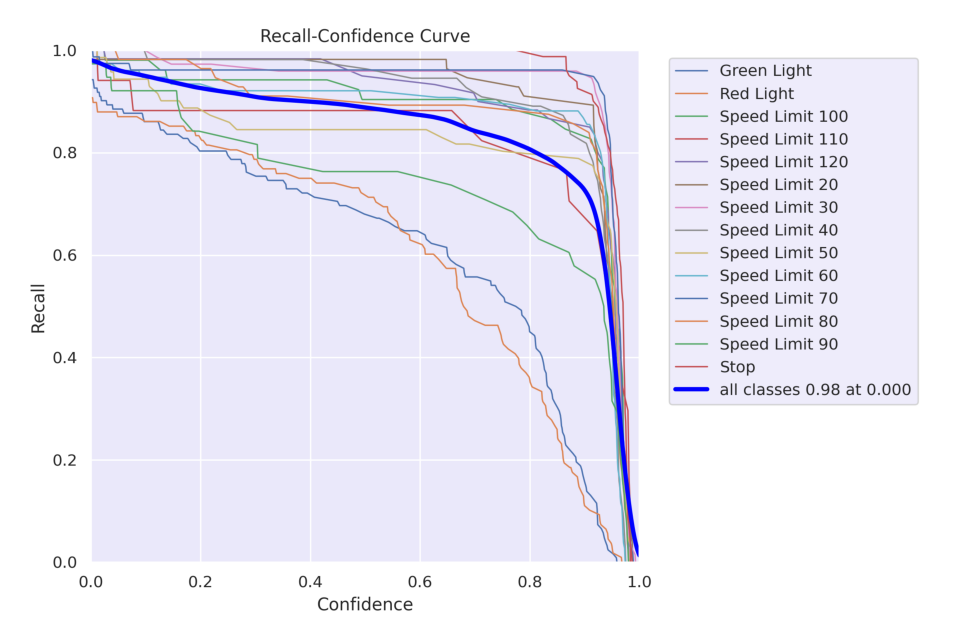

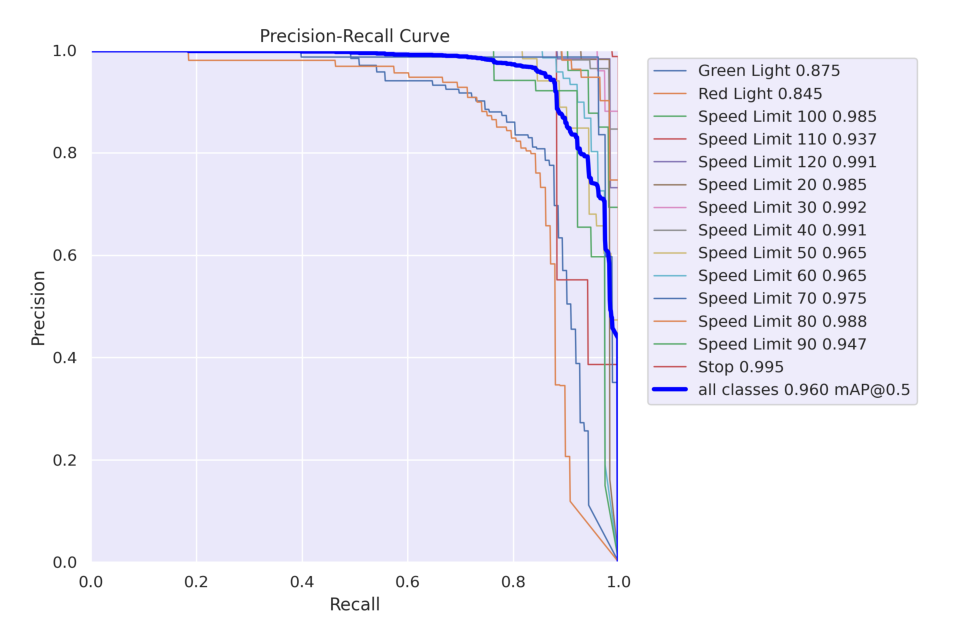

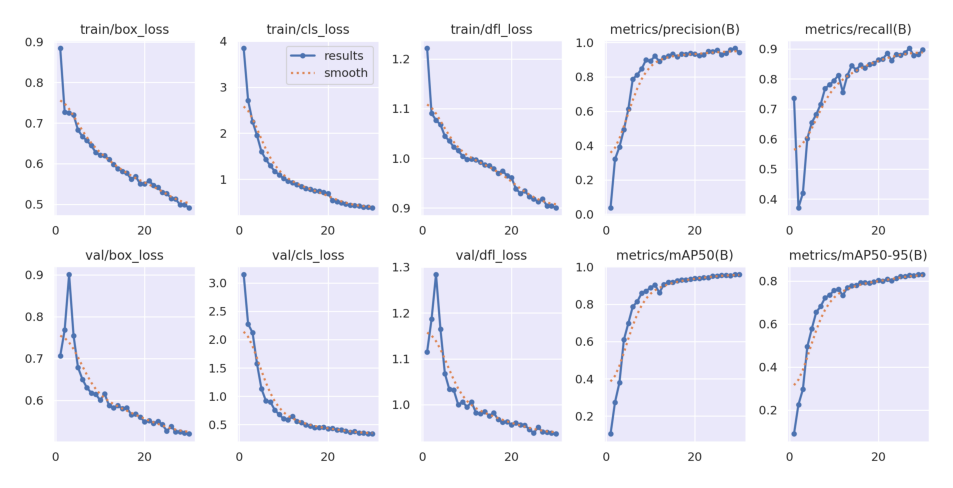

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1590.44         0.55766         0.54016         0.93863   
21     22  1661.14         0.54672         0.50895         0.92927   
22     23  1732.35         0.54175         0.48660         0.93456   
23     24  1802.25         0.52923         0.46044         0.92288   
24     25  1872.92         0.52678         0.44095         0.91845   
25     26  1944.26         0.51444         0.42974         0.91250   
26     27  2014.36         0.51270         0.41756         0.91797   
27     28  2086.13         0.49843         0.39307         0.90417   
28     29  2157.30         0.49849         0.39222         0.90381   
29     30  2229.32         0.49150         0.38190         0.90051   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.92521            0.86623           0.93942   
21               0.92831            0.88495           0.94278   
22               0.94817            0.86118           0.94319   
23               0.94782            0.88089           0.95007   
24               0.95670            0.87827           0.95169   
25               0.92839            0.88691           0.95429   
26               0.93752            0.90175           0.95559   
27               0.95734            0.87773           0.95394   
28               0.96664            0.88148           0.95973   
29               0.94219            0.89701           0.95976   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.79908       0.55172       0.43611       0.96019  0.000179   
21              0.80900       0.54544       0.40350       0.95595  0.000161   
22              0.80137       0.55015       0.40634       0.95520  0.000144   
23              0.81222       0.54239       0.38581       0.94605  0.000127   
24              0.82041       0.52690       0.36764       0.93817  0.000109   
25              0.82115       0.53814       0.37879       0.95052  0.000092   
26              0.82607       0.52498       0.35127       0.94062  0.000075   
27              0.82458       0.52527       0.35031       0.93981  0.000057   
28              0.82961       0.52191       0.33805       0.93845  0.000040   
29              0.83061       0.52027       0.33772       0.93637  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

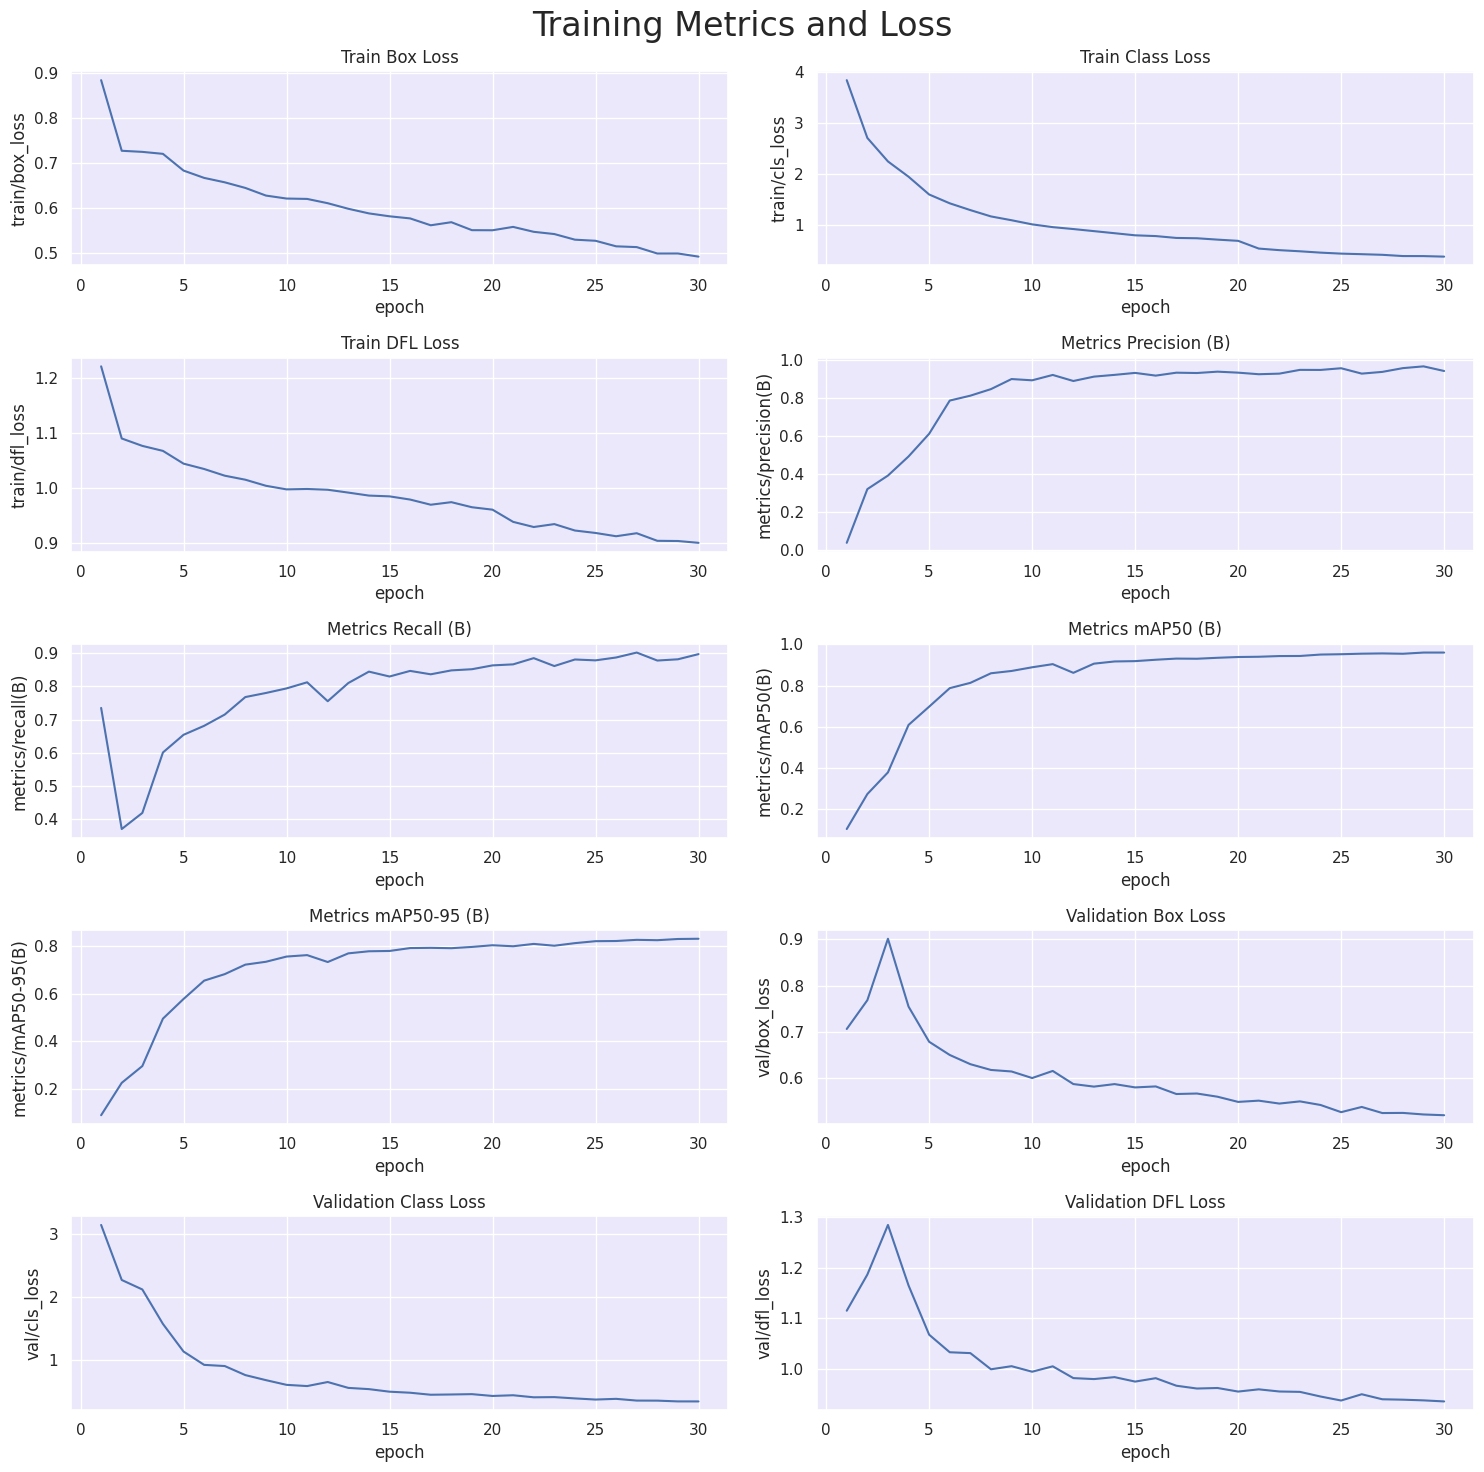

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.80it/s]


                   all        801        944      0.942      0.897      0.961      0.833
           Green Light         87        122      0.911      0.705      0.884      0.515
             Red Light         74        108      0.897      0.741      0.856      0.542
       Speed Limit 100         52         52      0.961       0.94      0.985      0.909
       Speed Limit 110         17         17       0.74      0.882      0.938      0.861
       Speed Limit 120         60         60      0.983      0.975      0.991      0.915
        Speed Limit 20         56         56      0.971      0.982      0.985      0.881
        Speed Limit 30         71         74      0.971      0.959      0.992       0.92
        Speed Limit 40         53         55      0.964      0.974      0.991      0.899
        Speed Limit 50         68         71      0.974      0.845      0.964      0.866
        Speed Limit 60         76         76      0.927      0.921      0.965      0.887
        Speed Limit 7


0: 640x640 1 Speed Limit 120, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 1 Stop, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 60, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inferenc

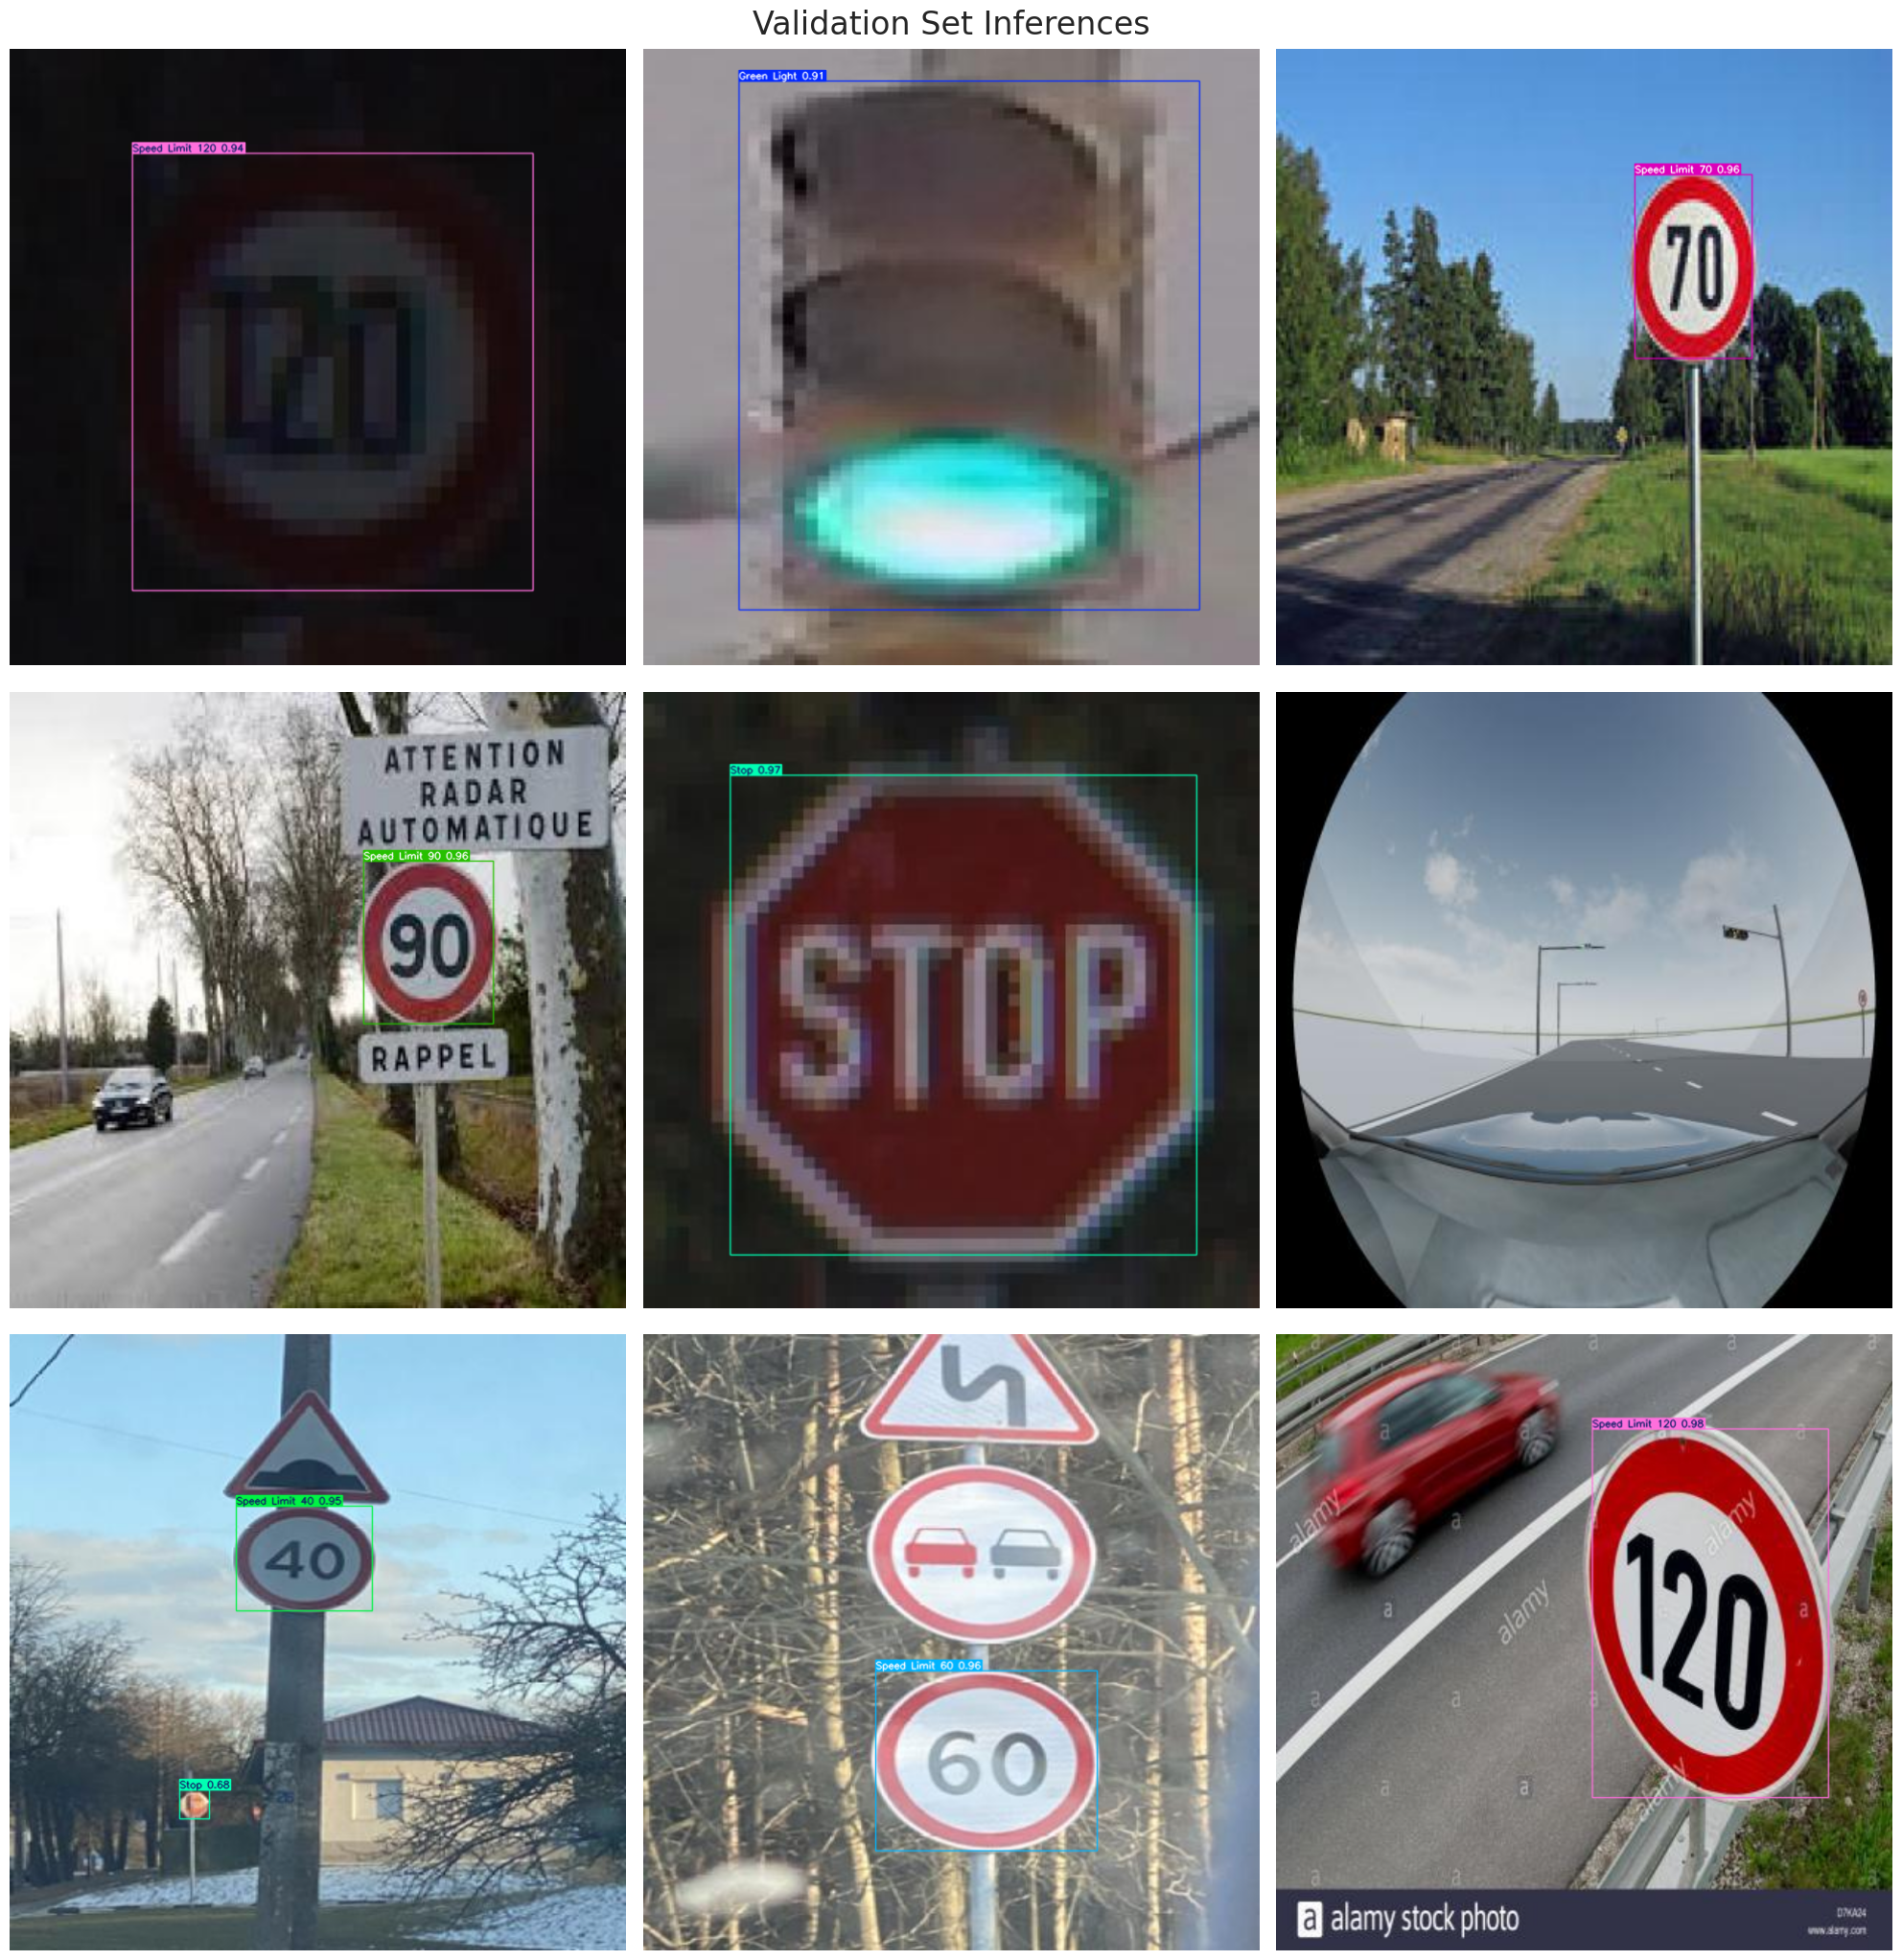

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
